In [10]:
# -------------------------
# 1. Import Libraries
# -------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -------------------------
# 2. Load Dataset (MNIST)
# -------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# -------------------------
# 3. Build Model (Simple CNN)
# -------------------------
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.network = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.network(x)

model = CNN()

# -------------------------
# 4. Loss & Optimizer
# -------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -------------------------
# 5. Train the Model
# -------------------------
epochs = 5

for epoch in range(epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# -------------------------
# 6. Evaluate Model
# -------------------------
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Test Accuracy:", correct / total)


100%|██████████| 9.91M/9.91M [00:00<00:00, 22.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 645kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.38MB/s]


Epoch [1/5], Loss: 0.1577
Epoch [2/5], Loss: 0.0094
Epoch [3/5], Loss: 0.0457
Epoch [4/5], Loss: 0.0031
Epoch [5/5], Loss: 0.0020
Test Accuracy: 0.9898


Using Colab cache for faster access to the 'ibmhr-dataset' dataset.
Dataset folder: /kaggle/input/ibmhr-dataset
Files: ['WA_Fn-UseC_-HR-Employee-Attrition.csv']
Data Loaded Successfully!
   Unnamed: 0  Age Attrition     BusinessTravel  DailyRate  \
0           0   41       Yes      Travel_Rarely       1102   
1           1   49        No  Travel_Frequently        279   
2           2   37       Yes      Travel_Rarely       1373   
3           3   33        No  Travel_Frequently       1392   
4           4   27        No      Travel_Rarely        591   

               Department  DistanceFromHome       Education EducationField  \
0                   Sales                 1         College  Life Sciences   
1  Research & Development                 8  Below College   Life Sciences   
2  Research & Development                 2         College          Other   
3  Research & Development                 3          Master  Life Sciences   
4  Research & Development                 2  Below

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        10,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8311 - loss: 0.4947 - val_accuracy: 0.8305 - val_loss: 0.4442
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8307 - loss: 0.4375 - val_accuracy: 0.8305 - val_loss: 0.4272
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8489 - loss: 0.3828 - val_accuracy: 0.8305 - val_loss: 0.4153
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.3301 - val_accuracy: 0.8263 - val_loss: 0.4092
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8555 - loss: 0.3250 - val_accuracy: 0.8347 - val_loss: 0.4046
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8501 - loss: 0.3044 - val_accuracy: 0.8390 - val_loss: 0.4016
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8534 - loss: 0.2996 - val_accuracy: 0.8475 - val_loss: 0.4063
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8765 - loss: 0.2529 - val_accuracy: 0.8475 - val_loss

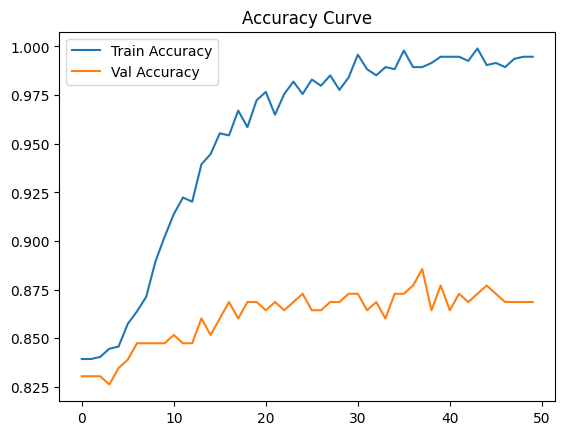

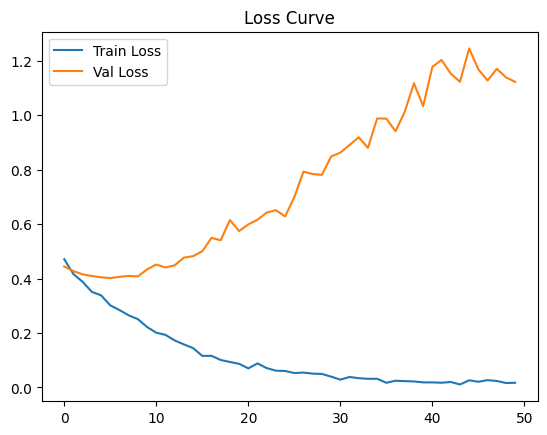

In [13]:
# ---------------------------------------------------------
# IBM HR Attrition Prediction Using TensorFlow (ANN Model)
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# ---------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------
import kagglehub
import pandas as pd
import os

# Download dataset folder
path = kagglehub.dataset_download("mohamedhamdymady/ibmhr-dataset")

print("Dataset folder:", path)
print("Files:", os.listdir(path))

# Pick the correct CSV file
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]

# Load it
df = pd.read_csv(os.path.join(path, csv_file))

print("Data Loaded Successfully!")
print(df.head())

# ---------------------------------------------------------
# 2. Encode Categorical Columns
# ---------------------------------------------------------
label_cols = []
onehot_cols = []

# Identify categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].nunique()
        if unique_vals <= 2:
            label_cols.append(col)
        else:
            onehot_cols.append(col)

# Label Encoding (binary categories)
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encoding (multi-category)
df = pd.get_dummies(df, columns=onehot_cols)

# ---------------------------------------------------------
# 3. Split Features and Target
# ---------------------------------------------------------
X = df.drop("Attrition", axis=1)   # Features
y = df["Attrition"]                # Target (0 = No, 1 = Yes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------
# 4. Normalize (Standard Scaling)
# ---------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------------------------------
# 5. Build TensorFlow ANN Model
# ---------------------------------------------------------
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(16, activation='relu'),

    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ---------------------------------------------------------
# 6. Train Model
# ---------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------------------------------------------
# 7. Evaluate Model
# ---------------------------------------------------------
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 8. Plot Training Curves
# ---------------------------------------------------------
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

In [15]:
df.head()

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,YearsAtCompanyGroups_G - 21 => 25 Years,YearsAtCompanyGroups_H - 25 => 30 Years,YearsAtCompanyGroups_I - 31 => 35 Years,YearsAtCompanyGroups_J - 36 => 40 Years,AgeGroups_A - 18 => 21 Years,AgeGroups_B - 22 => 25 Years,AgeGroups_C - 26 => 30 Years,AgeGroups_D - 31 => 40 Years,AgeGroups_E - 41 => 50 Years,AgeGroups_F - 51 => 60 Years
0,0,41,1,1102,1,1,1,2,0,94,...,False,False,False,False,False,False,False,False,True,False
1,1,49,0,279,8,1,2,3,1,61,...,False,False,False,False,False,False,False,False,True,False
2,2,37,1,1373,2,1,4,4,1,92,...,False,False,False,False,False,False,False,True,False,False
3,3,33,0,1392,3,1,5,4,0,56,...,False,False,False,False,False,False,False,True,False,False
4,4,27,0,591,2,1,7,1,1,40,...,False,False,False,False,False,False,True,False,False,False


Using Colab cache for faster access to the 'ibmhr-dataset' dataset.
Data Loaded Successfully!
   Unnamed: 0  Age Attrition     BusinessTravel  DailyRate  \
0           0   41       Yes      Travel_Rarely       1102   
1           1   49        No  Travel_Frequently        279   
2           2   37       Yes      Travel_Rarely       1373   
3           3   33        No  Travel_Frequently       1392   
4           4   27        No      Travel_Rarely        591   

               Department  DistanceFromHome       Education EducationField  \
0                   Sales                 1         College  Life Sciences   
1  Research & Development                 8  Below College   Life Sciences   
2  Research & Development                 2         College          Other   
3  Research & Development                 3          Master  Life Sciences   
4  Research & Development                 2  Below College         Medical   

   EmployeeCount  ...  YearsSinceLastPromotion  YearsWithCurrMan

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,129 (63.00 KB)

 Trainable params: 16,129 (63.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8338 - loss: 0.4963 - val_accuracy: 0.8305 - val_loss: 0.4227
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8635 - loss: 0.3872 - val_accuracy: 0.8305 - val_loss: 0.4121
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8418 - loss: 0.3950 - val_accuracy: 0.8305 - val_loss: 0.3833
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8340 - loss: 0.3802 - val_accuracy: 0.8432 - val_loss: 0.3577
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.3749 - val_accuracy: 0.8559 - val_loss: 0.3400
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8833 - loss: 0.2913 - val_accuracy: 0.8475 - val_loss: 0.3378
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8687 - loss: 0.3300 - val_accuracy: 0.8517 - val_loss: 0.3269
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8755 - loss: 0.3128 - val_accuracy: 0.8559 - val_loss

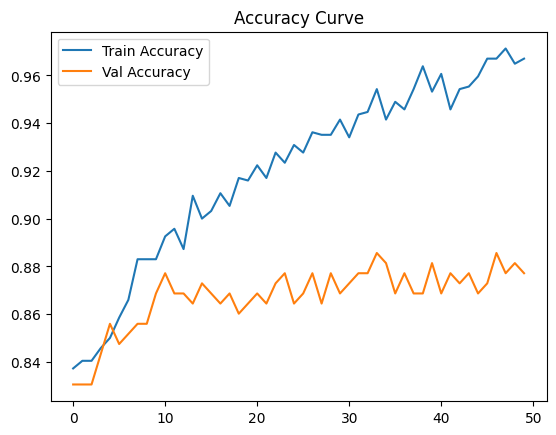

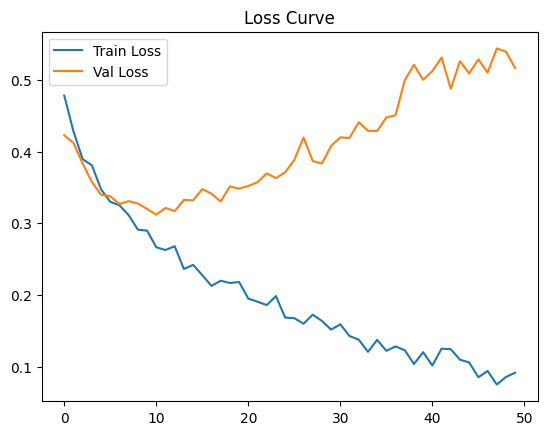

In [16]:
 # ---------------------------------------------------------
# IBM HR Attrition Prediction Using TensorFlow (Without One-Hot Encoding)
# ---------------------------------------------------------

import kagglehub
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# ---------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------
path = kagglehub.dataset_download("mohamedhamdymady/ibmhr-dataset")

csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

print("Data Loaded Successfully!")
print(df.head())

# ---------------------------------------------------------
# 2. Encode ALL categorical columns with LabelEncoder
# ---------------------------------------------------------
label_encoders = {}

for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

print("\nLabel Encoding Completed!")
print(df.head())

# ---------------------------------------------------------
# 3. Split Features and Target
# ---------------------------------------------------------
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------
# 4. Feature Scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------------------------------
# 5. ANN Model
# ---------------------------------------------------------
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ---------------------------------------------------------
# 6. Train the Model
# ---------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------------------------------------------
# 7. Evaluate the Model
# ---------------------------------------------------------
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 8. Plot Training Curves
# ---------------------------------------------------------
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()